# Support Vector Classification & kNN with sklearn

Credits: https://github.com/ksopyla/svm_mnist_digit_classification

In [ ]:
# standard imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
%matplotlib inline

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
# fetch original mnist dataset
from sklearn.datasets import fetch_openml
from matplotlib.colors import Normalize
import seaborn as sb


In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0],nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))



In [ ]:
# load data

# fetch mnist data
# mnist = fetch_mldata('MNIST original', data_home='./')

# mnist object contains: data, COL_NAMES, DESCR, target fields
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

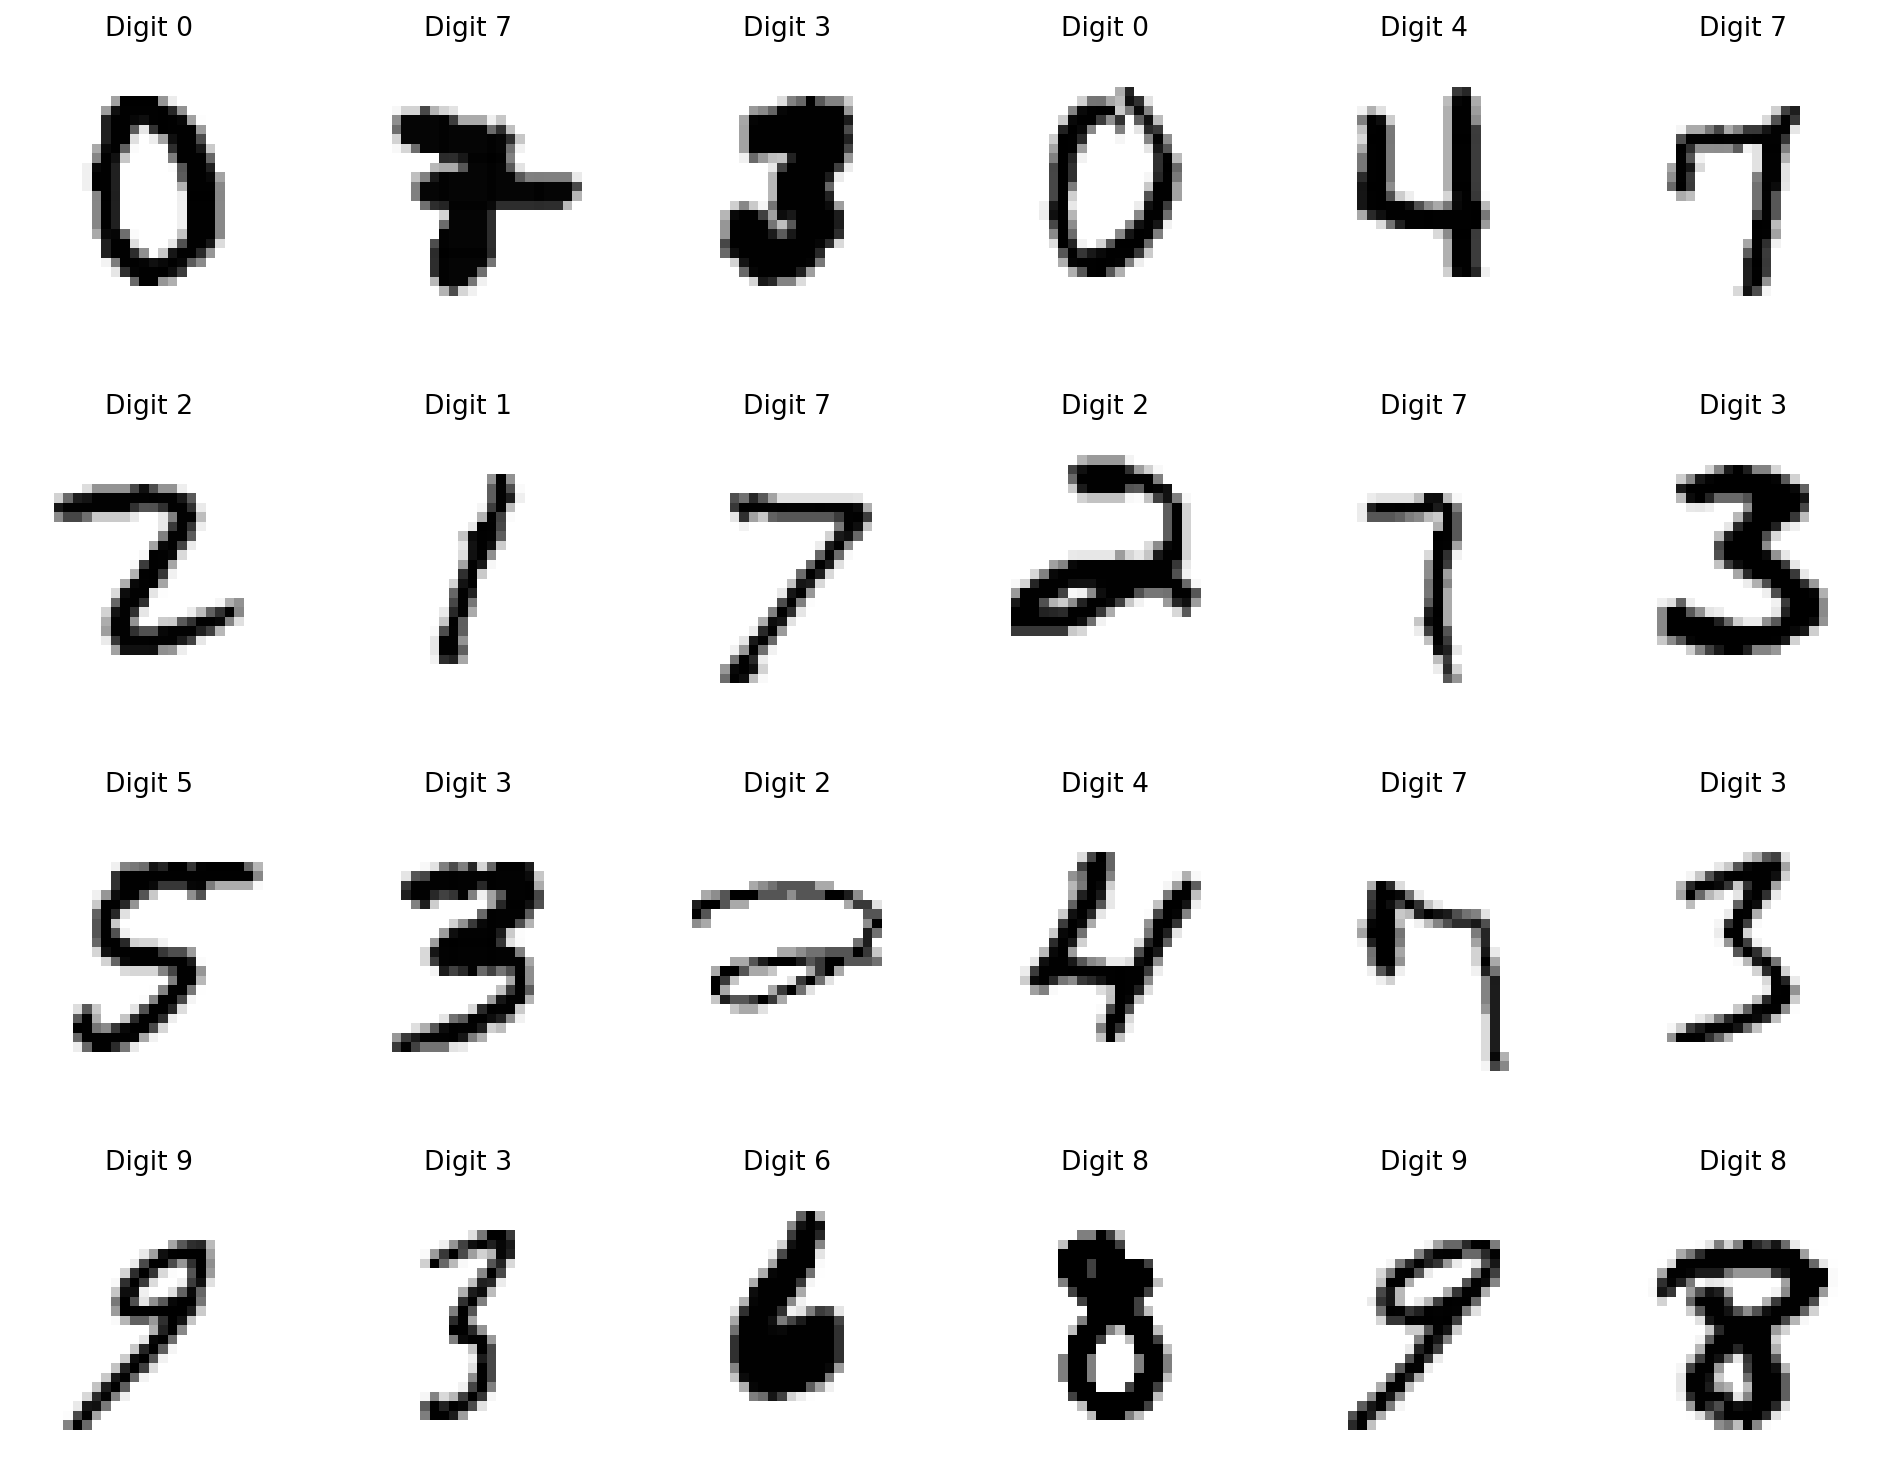

In [ ]:
# split data into image and targets

# data field is 70k x 784 array, each row represents pixels from 28x28=784 image
images = mnist.data.values[:5000, :]
targets = mnist.target[:5000]

# Let's have a look at the random 16 images, 
# We have to reshape each data row, from flat array of 784 int to 28x28 2D array

#pick  random indexes from 0 to size of our dataset
show_some_digits(images, targets)

In [ ]:
#full dataset classification
# normalise x values
X_data = images/255.0
# set y as the targets
Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

In [ ]:
# create a support vector classifier, and train it

# set params to pre-determined optimal values
param_C = 100
param_gamma = 0.05

# create clasifier according to params
classifier = svm.SVC(C=param_C,gamma=param_gamma)

# we learn the digits on train part
# start timing
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

# train our SVM
classifier.fit(X_train, y_train)

# stop timing, print elapsed
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2022-06-07 21:58:59.019938
Stop learning 2022-06-07 21:59:09.840268
Elapsed learning 0:00:10.820330


In [ ]:
# now predict the value of the test

# get actual y values
expected = y_test
# predicted y values based on x values using SVM model
predicted = classifier.predict(X_test)

# show a few digits and the predictions
# show_some_digits(X_test,predicted,title_text="Predicted {}")


# print metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

#plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

Classification report for classifier SVC(C=100, gamma=0.05):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.98      0.98      0.98        93
           2       0.83      0.98      0.90        65
           3       0.97      0.91      0.94        80
           4       0.95      0.96      0.96        80
           5       0.94      0.95      0.94        62
           6       0.99      0.97      0.98        79
           7       1.00      0.94      0.97        87
           8       0.95      0.92      0.94        65
           9       0.93      0.93      0.93        68

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.96      0.95      0.95       750


Confusion matrix:
[[69  0  0  0  1  0  0  0  1  0]
 [ 0 91  1  0  0  0  0  0  1  0]
 [ 0  0 64  0  1  0  0  0  0  0]
 [ 0  0  4 73  0  2  0  0  0  1]
 [ 0  0  1  0 77  0  0  0  0 

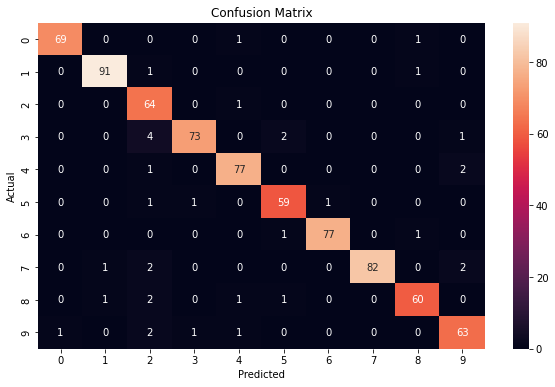

In [ ]:
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification report for classifier SVC(C=100, gamma=0.05):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.90      0.99      0.94        93
           2       0.94      0.92      0.93        65
           3       0.91      0.94      0.93        80
           4       0.94      0.91      0.92        80
           5       0.95      0.89      0.92        62
           6       0.94      0.99      0.96        79
           7       0.96      0.94      0.95        87
           8       0.98      0.83      0.90        65
           9       0.89      0.94      0.91        68

    accuracy                           0.94       750
   macro avg       0.94      0.93      0.94       750
weighted avg       0.94      0.94      0.94       750


Confusion matrix:
[[70  0  0  0  0  1  0  0  0  0]
 [ 0 92  0  1  0  0  0  0  0  0]
 [ 1  1 60  0  0  0  1  2  0  0]
 [ 0  0  2 75  0  2  0  0  1  0]
 [ 0  1  0  0 73  0  2  0  0 

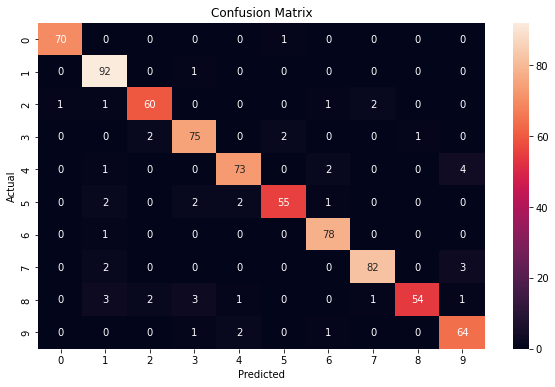

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

predicted = neigh.predict(X_test)
# print metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

#plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()